In [29]:
!pip install fbprophet

In [30]:
import fbprophet
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline


In [31]:
df = pd.read_csv('/content/drive/MyDrive/certificates /nse.csv')

In [32]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-01,13758.599609,14336.349609,13661.750000,14281.200195,14281.200195,870500
1,2021-02-02,14481.099609,14731.700195,14469.150391,14647.849609,14647.849609,915000
2,2021-02-03,14754.900391,14868.849609,14574.150391,14789.950195,14789.950195,869500
3,2021-02-04,14789.049805,14913.700195,14714.750000,14895.650391,14895.650391,884700
4,2021-02-05,14952.599609,15014.650391,14864.750000,14924.250000,14924.250000,935600
...,...,...,...,...,...,...,...
242,2022-01-21,17613.699219,17707.599609,17485.849609,17617.150391,17617.150391,277600
243,2022-01-24,17575.150391,17599.400391,16997.849609,17149.099609,17149.099609,323800
244,2022-01-25,17001.550781,17309.150391,16836.800781,17277.949219,17277.949219,326500
245,2022-01-27,17062.000000,17182.500000,16866.750000,17110.150391,17110.150391,395600


In [33]:
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-01,13758.599609,14336.349609,13661.750000,14281.200195,14281.200195,870500
1,2021-02-02,14481.099609,14731.700195,14469.150391,14647.849609,14647.849609,915000


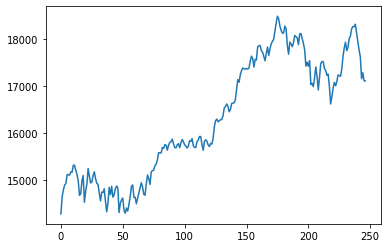

In [34]:
df['Close'].plot()

In [35]:
df.rename(columns={'Date':'ds','Close':'y'},inplace=True)

In [36]:
df.head(2)

,ds,Open,High,Low,y,Adj Close,Volume
0,2021-02-01,13758.599609,14336.349609,13661.750000,14281.200195,14281.200195,870500
1,2021-02-02,14481.099609,14731.700195,14469.150391,14647.849609,14647.849609,915000


In [37]:

df.drop(['Open','High','Low','Adj Close','Volume'],axis=1,inplace=True)

In [38]:
df.head(2)

,ds,y
0,2021-02-01,14281.200195
1,2021-02-02,14647.849609


In [39]:
df.dtypes

ds     object
y     float64
dtype: object

In [40]:

df['ds']=pd.to_datetime(df['ds'])

In [41]:


df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [42]:
from fbprophet import Prophet


In [43]:


dir(Prophet)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [44]:
model=Prophet()


In [45]:
df.dropna(axis=0,inplace=True)


In [46]:

model.fit(df)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [47]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [48]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [49]:
future_dates=model.make_future_dataframe(periods=15)


In [50]:
future_dates.tail()


,ds
257,2022-02-08
258,2022-02-09
259,2022-02-10
260,2022-02-11
261,2022-02-12


In [51]:


prediction=model.predict(future_dates)


In [52]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-02-01,14891.940942,14660.281021,15359.531964,14891.940942,14891.940942,92.319510,92.319510,92.319510,92.319510,92.319510,92.319510,0.0,0.0,0.0,14984.260452
1,2021-02-02,14886.816889,14666.812034,15343.588710,14886.816889,14886.816889,135.783065,135.783065,135.783065,135.783065,135.783065,135.783065,0.0,0.0,0.0,15022.599955
2,2021-02-03,14881.692837,14674.666857,15377.331606,14881.692837,14881.692837,160.972897,160.972897,160.972897,160.972897,160.972897,160.972897,0.0,0.0,0.0,15042.665734
3,2021-02-04,14876.568784,14658.662100,15405.031848,14876.568784,14876.568784,147.930796,147.930796,147.930796,147.930796,147.930796,147.930796,0.0,0.0,0.0,15024.499580
4,2021-02-05,14871.444732,14599.196391,15323.440411,14871.444732,14871.444732,95.551587,95.551587,95.551587,95.551587,95.551587,95.551587,0.0,0.0,0.0,14966.996319


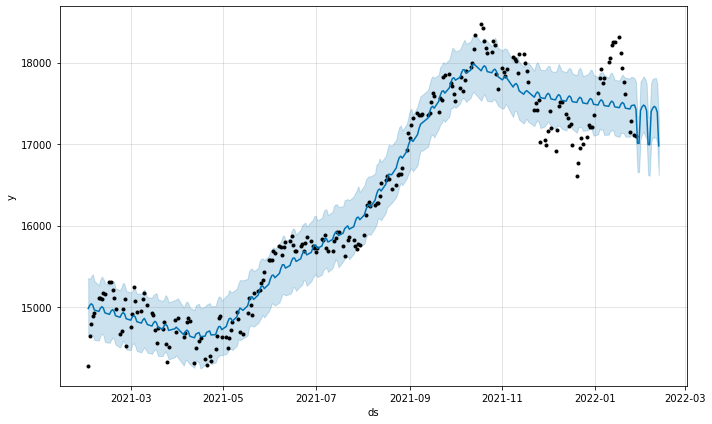

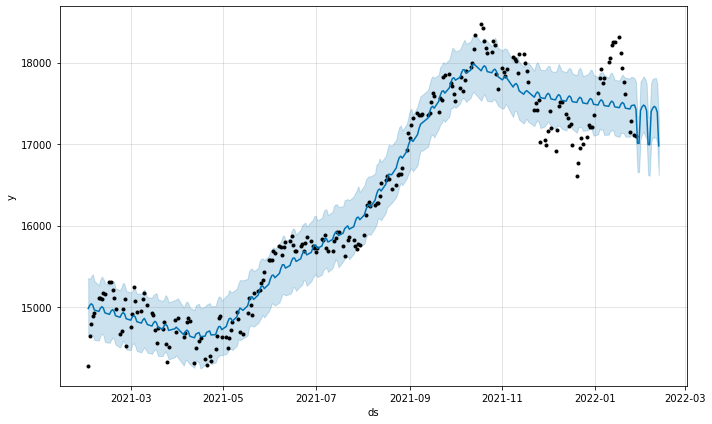

In [53]:
model.plot(prediction)

In [54]:
#dot is real , dark is projection , light blue is trend 

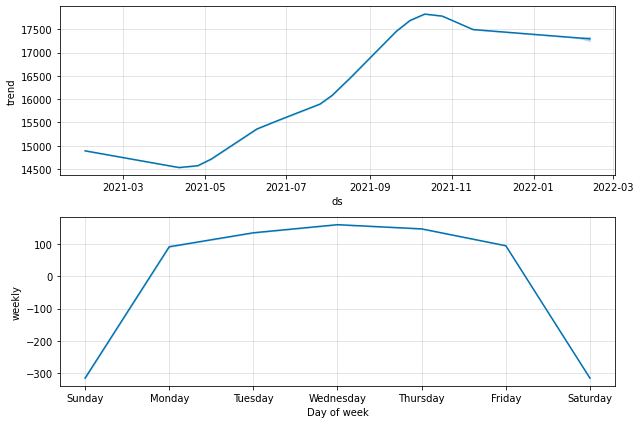

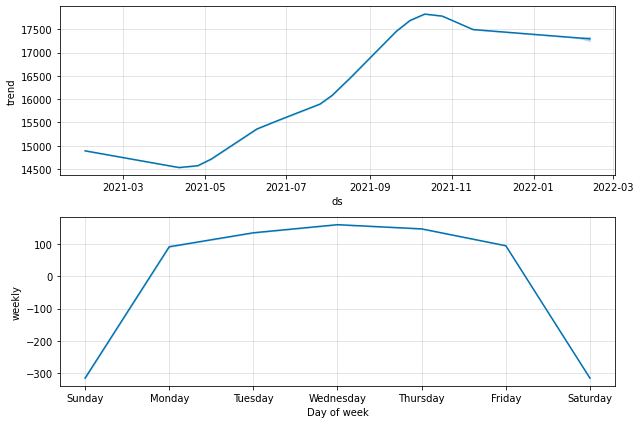

In [55]:
model.plot_components(prediction)

In [56]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='15 days', period='8 days', horizon = '15 days')
df_cv.head()

INFO:fbprophet:Making 42 forecasts with cutoffs between 2021-02-19 00:00:00 and 2022-01-13 00:00:00


  0%|          | 0/42 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-02-22,14750.374365,14580.570234,14929.683357,14675.700195,2021-02-19
1,2021-02-23,14662.719005,14397.660217,14967.414840,14707.799805,2021-02-19
2,2021-02-24,14558.169201,14174.015215,15010.139530,14982.000000,2021-02-19
3,2021-02-25,14468.219004,13928.144582,15074.835108,15097.349609,2021-02-19
4,2021-02-26,14331.018810,13606.726095,15131.985073,14529.150391,2021-02-19


In [57]:
#train 1960 - 1962

#1960 - 1961   train
#1961 - 1962   test
#next will be projection 

In [58]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,2 days,91141.969026,301.897282,223.191073,0.013568,0.011207,0.596880
1,3 days,106163.844917,325.827938,253.591645,0.015604,0.012102,0.518883
2,4 days,159207.038562,399.007567,301.315130,0.018429,0.015017,0.458554
3,5 days,178010.764498,421.913219,333.014446,0.020211,0.017352,0.387521
4,6 days,190350.098091,436.291300,351.534863,0.021196,0.018891,0.341837


In [59]:
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,coverage
0,2 days,91141.969026,301.897282,223.191073,0.013568,0.011207,0.596880
1,3 days,106163.844917,325.827938,253.591645,0.015604,0.012102,0.518883
2,4 days,159207.038562,399.007567,301.315130,0.018429,0.015017,0.458554
3,5 days,178010.764498,421.913219,333.014446,0.020211,0.017352,0.387521
4,6 days,190350.098091,436.291300,351.534863,0.021196,0.018891,0.341837
